In [2]:
from FlowControl import add_to_class
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

<h1>Logistic Regression</h1>

<h2>1. Importing data set</h2>

In [3]:
from sklearn.datasets import load_iris

data_set = load_iris()

In [4]:
data_dict = {
    "features" : DataFrame({data_set['feature_names'][i] : data_set['data'][:,i] for i in range(len(data_set['feature_names']))}),
    "feature_names" : data_set['feature_names'],
    "targets"  : Series({"y" : data_set['target']}),
    "target_names" : data_set['target_names']
}

In [5]:
data_dict["features"][:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
data_dict["targets"]["y"][:5]


array([0, 0, 0, 0, 0])

In [7]:
def show_iris(fig,data_dict):
    colors = ["red","blue","green"]
    fig.suptitle("Iris dataset")
    ft_num = len(data_dict["features"].keys())
    for i in range(ft_num**2):
        ax = fig.add_subplot(ft_num,ft_num,i+1)
        ax.grid(True)
        m = data_dict["feature_names"][i // 4]
        n = data_dict["feature_names"][i % 4]
        for j in range(len(data_set["target_names"])):
            inds = (data_dict["targets"]["y"] == j)
            x0 = data_dict["features"].iloc[inds][m]
            x1 = data_dict["features"].iloc[inds][n]
            ax.scatter(x0,x1,color = colors[j],alpha = 0.4)
            ax.set_xlabel(m)
            ax.set_ylabel(n)


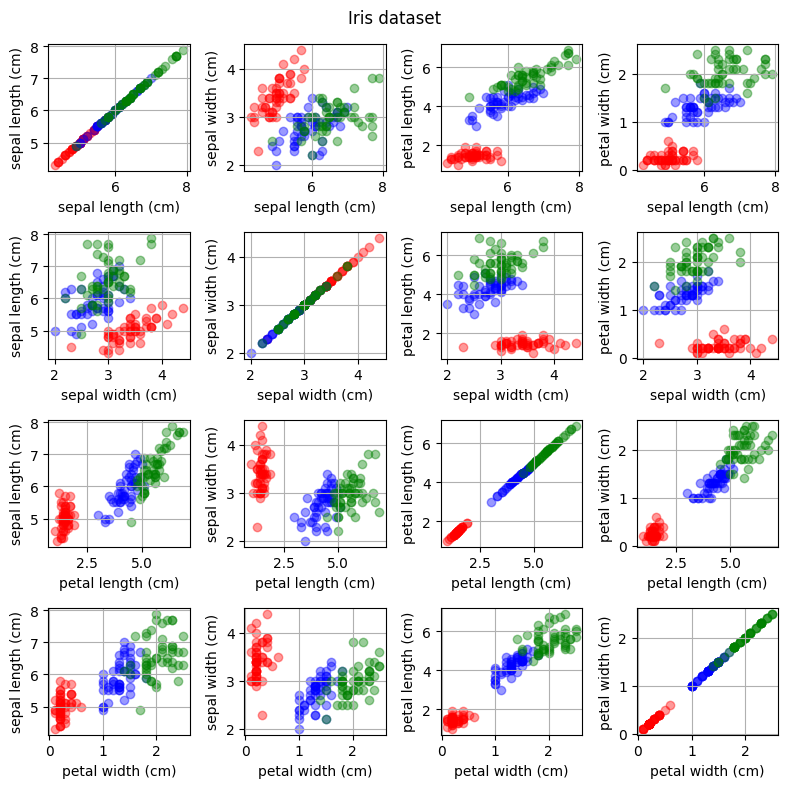

In [8]:
fig = plt.figure(figsize = (8,8))
show_iris(fig,data_dict)
plt.tight_layout()

<h2>2. Basic Classification</h2>

Our goal is to construct a model that distinguish between two classes labelsed by $0$ and $1$. We assume that the boundary between two classes can be described by a linear function of input features. If the target value is equal to $1$, then the probability of clssifying it as $1$ should be a function that is proportional to the threshold function $\phi$. The most popular choice is the **sigmoid function**:
$$
\phi(\beta ,z) = \frac{1}{1+e^{-\beta z}}
$$

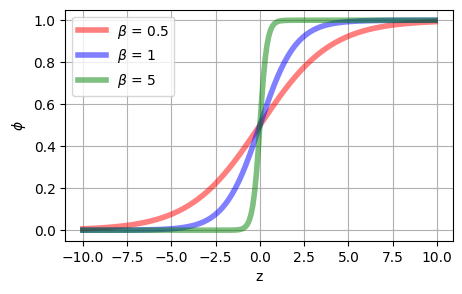

In [9]:
fig = plt.figure(figsize = (5,3))
ax = fig.add_subplot()

ax.set_xlabel("z")
ax.set_ylabel(r"$\phi$")
ax.grid(True)

betas = [0.5,1,5]
colors = ["red","blue","green"]
z_ = np.arange(-10,10,0.1)

for i in range(len(betas)):
    y = 1 / (1 + np.exp(-betas[i] * z_))
    ax.plot(z_,y,color = colors[i],lw = 4,alpha = 0.5,label = r"$\beta$ = "+f"{betas[i]}")
    ax.fill_between(np.zeros(len(z_)),y)

ax.legend()
plt.show()

We can write the mathematical formula for the above assumption in terms of the Bernulli distributon:
$$
p(\hat{y}^{(i)}|\vec{x}^{(i)};\vec{\omega}) = \phi(\vec{\omega}\cdot \vec{x}^{(i)})^{\hat{y}^{(i)}}(1-\phi(\vec{\omega}\cdot \vec{x}^{(i)}))^{1-\hat{y}^{(i)}}
$$
log-likelyhood for total set:
$$
\hat{\mathcal{L}}(\vec{\omega}) = -\log{\prod_{i=1}^{n}p(\hat{y}^{(i)}|\vec{x}^{(i)};\vec{\omega})} = -\sum_{i=1}^{n} \log{p(\hat{y}^{(i)}|\vec{x}^{(i)};\vec{\omega})} =
-\sum_{i=1}^{n}[\hat{y}^{(i)}\log{\phi(\vec{\omega}\cdot \vec{x}^{(i)})} + (1-\hat{y}^{(i)})\log{(1 - \phi(\vec{\omega}\cdot \vec{x}^{(i)}))} ]
$$

before moving-on to the discussion of gradient, it would be usefull to calculate also the derivative of $\phi$ with respect to its argument.
$$
\frac{d}{dz}\phi(z) = \frac{1}{(1+e^{-\psi(z)})^{2}}e^{-\psi(z)}\frac{d\psi}{dz} = \phi(z)(1-\phi(z))\frac{d\psi}{dz}
$$
therefore:
$$
\vec{\nabla}_{\vec{\omega}} \phi(\vec{\omega} \cdot \vec{x}^{(i)}) = \phi(\vec{\omega} \cdot \vec{x}^{(i)})(1-\phi(\vec{\omega} \cdot \vec{x}^{(i)}))\vec{x}^{(i)}
$$

$$
\vec{\nabla}_{\vec{\omega}} \hat{\mathcal{L}}(\vec{\omega})  = -\sum_{i=1}^{n} (\hat{y}^{(i)}(1- \phi(\vec{\omega}\cdot\vec{x}^{(i)})) - (1-\hat{y}^{(i)})\phi(\vec{\omega}\cdot\vec{x}^{(i)}))\vec{x}^{(i)} = -\sum_{i=1}^{n} (\hat{y}^{(i)} - \phi(\vec{\omega}\cdot\vec{x}^{(i)}))\vec{x}^{(i)}
$$

We are allowed to use the same update rule for $\vec{\omega}$ as for the linear regression:
$$
\vec{\omega} := \vec{\omega} +\alpha \frac{1}{|\mathcal{B}_{t}|}\sum_{\mathcal{B}_{t}}(\hat{y}^{(i)} - \phi(\vec{\omega}\cdot\vec{x}^{(i)}))\vec{x}^{(i)}
$$

In [10]:
class LogisitcRegression_:
    def __init__(self,alpha = 0.01,steps = 10000):
        self.alpha = alpha
        self.steps = steps

    def fit(self,X,y,batch_size = 1,seed = 42):
        #default setting : Stochastic gradient descent
        raise NotImplementedError

    def batch_grad(self,X,y,B):
        raise NotImplementedError
    
    def Cost_function(self,X,y):
        raise NotImplementedError
    
    def PreProcessing(self,X,y):
        raise NotImplementedError

In [11]:
@add_to_class(LogisitcRegression_)
def fit(self,X,y,batch_size = 1,seed = 42,collect_data = False,scale_features = False):
    assert isinstance(X,np.ndarray) , "Invalid input datatype for X"
    assert isinstance(y,np.ndarray) , "Invalid input datatype for y"

    if len(X.shape) == 1:
        n = X.shape
        d = 1
    else:
        n,d = X.shape

    X_prime,means_x,stds_x = self.PreProcessing(X,scale_features)
    y_prime = y
    X_bias = np.hstack((X_prime,np.ones(n).reshape(-1,1)))
    rng = np.random.default_rng(seed)
    self.w_ = rng.normal(loc = 0. , scale = 0.1,size = d+1)
    L_data = []
    w_data = []

    for _ in range(self.steps):
        if collect_data:
            L_data.append(self.Cost_function(X_bias,y))
            w_data.append(self.w_)
        B = np.random.choice(n,size = batch_size)
        self.w_ += self.alpha / len(B) * self.batch_grad(X_bias,y_prime,B)
        
    self.rescale_features(means_x,stds_x,scale_features)
    if collect_data:
        return self.w_,L_data,w_data
    else:
        return self.w_

@add_to_class(LogisitcRegression_)
def rescale_features(self,means_x,stds_x,scale_features = True):
    if scale_features:
        self.w_[-1] = self.w_[-1] - sum(means_x * self.w_[:-1] /stds_x)
        self.w_[:-1] = self.w_[:-1] / stds_x
    
@add_to_class(LogisitcRegression_)
def PreProcessing(self,X,scale_features = True):
    means_x = np.mean(X,axis = 0)
    stds_x = np.std(X,axis = 0)

    if scale_features:
        return (X-means_x)/stds_x,means_x,stds_x
    else:
        return X, means_x,stds_x

@add_to_class(LogisitcRegression_)
def batch_grad(self,X,y,B):
    return (X[B]).T @ ((y - self.phi(X @ self.w_))[B])

@add_to_class(LogisitcRegression_)
def phi(self,z):
    return 1 / (1 + np.exp(-z))

@add_to_class(LogisitcRegression_)
def Cost_function(self,X,y):
    ph = self.phi(X @ self.w_)
    return -(y @ np.log(ph) + (1-y) @ np.log(1-ph))

@add_to_class(LogisitcRegression_)
def predict(self,X_test):
    n = X_test.shape[0]
    X_bias = np.hstack((X_test,np.ones(n).reshape(-1,1)))
    y_pred = self.phi(X_bias @ self.w_)
    return np.where(y_pred > 0.5 ,1. ,0.)

sepal length/ sepal width analysis

In [12]:
X_data = data_dict["features"][data_dict["feature_names"][0:2]].to_numpy()
y_data = (data_dict["targets"]["y"] == 0)
y_data_prime = (data_dict["targets"]["y"] != 0)

In [13]:
def train_test_split(X_data,y_data,scale = 0.7):
    n = X_data.shape[0]
    rng = np.random.default_rng(42)
    inds = rng.choice(n,int(scale * n))
    inds_prime = np.array([i for i in range(n) if i not in set(inds)])
    return X_data[inds],X_data[inds_prime],y_data[inds],y_data[inds_prime]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,scale = 0.7)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 2)
(75, 2)
(105,)
(75,)


In [15]:
def accuracy_score(y_test,y_pred):
    return 1. - sum(abs(y_test - y_pred)) / len(y_pred)

In [16]:
model_LogReg1 = LogisitcRegression_(alpha=1e-2,steps = 20000)
w_t1,L_d1,w_d1 = model_LogReg1.fit(X_train,y_train,batch_size=1,collect_data=True,scale_features=False)
print(f"accuracy score for Stochastic GD : {accuracy_score(y_test,model_LogReg1.predict(X_test))}")

model_LogReg2 = LogisitcRegression_(alpha=1e-2,steps = 20000)
w_t2,L_d2,w_d2 = model_LogReg2.fit(X_train,y_train,batch_size=X_train.shape[0]//5,collect_data=True,scale_features=False)
print(f"accuracy score for Mini-batch GD : {accuracy_score(y_test,model_LogReg2.predict(X_test))}")

model_LogReg3 = LogisitcRegression_(alpha=1e-2,steps = 20000)
w_t3,L_d3,w_d3 = model_LogReg3.fit(X_train,y_train,batch_size=X_train.shape[0],collect_data=True,scale_features=False)
print(f"accuracy score for GD : {accuracy_score(y_test,model_LogReg3.predict(X_test))}")


accuracy score for Stochastic GD : 1.0
accuracy score for Mini-batch GD : 1.0
accuracy score for GD : 1.0


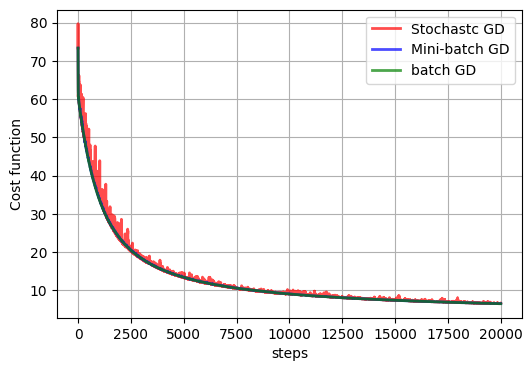

In [17]:
Losses = [L_d1,L_d2,L_d3]
colors = ["red","blue","green"]
labels = ["Stochastc GD", "Mini-batch GD", "batch GD"]

fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()
ax.set_xlabel("steps")
ax.set_ylabel("Cost function")
ax.grid(True)
for i in range(len(Losses)):
    ax.plot(Losses[i],lw = 2, color = colors[i],alpha = 0.7,label = labels[i])
ax.legend()
plt.show()

In [18]:
x0_ = np.arange(1.5,5,0.01)
x1_ = np.arange(4,8.5,0.01)
bias = np.ones(len(x0_) * len(x1_)).reshape(len(x1_),len(x0_))

x0,x1 = np.meshgrid(x0_,x1_)
X = np.stack((x1[:,:],x0[:,:],bias[:,:]),axis = 2)
Z = np.sum(X * w_t3,axis = 2)
y_pred_all = 1 / (1 + np.exp(-Z))

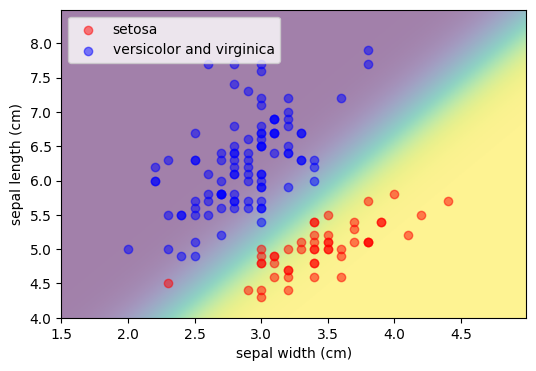

In [19]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot()
ax.imshow(y_pred_all,origin="lower",aspect = 'auto',alpha = 0.5,extent=[x0_.min(),x0_.max(),x1_.min(),x1_.max()])
ax.scatter(X_data[y_data,1],X_data[y_data,0],color = "red",alpha = 0.5,label = data_dict["target_names"][0])
ax.scatter(X_data[y_data_prime,1],X_data[y_data_prime,0],color = "blue",alpha = 0.5,label = data_dict["target_names"][1] + " and " + data_dict["target_names"][2])
ax.set_xlabel(data_dict["feature_names"][1])
ax.set_ylabel(data_dict["feature_names"][0])

ax.legend()
plt.show()

<h3>Training total data set</h3>

In [20]:
X_data_tot = data_dict["features"][data_dict["feature_names"]].to_numpy()
y_data_tot = (data_dict["targets"]["y"] == 1)
y_data_tot_prime = (data_dict["targets"]["y"] != 1)

In [21]:
X_train_tot,X_test_tot,y_train_tot,y_test_tot = train_test_split(X_data_tot,y_data_tot,scale = 0.7)

print(X_train_tot.shape)
print(X_test_tot.shape)
print(y_train_tot.shape)
print(y_test_tot.shape)

(105, 4)
(75, 4)
(105,)
(75,)


In [22]:
model_LogReg1_tot = LogisitcRegression_(alpha=1e-2,steps = 60000)
w_t1_tot,L_d1_tot,w_d1_tot = model_LogReg1_tot.fit(X_train_tot,y_train_tot,batch_size=1,collect_data=True,scale_features=False)
print(f"accuracy score for Stochastic GD : {accuracy_score(y_test_tot,model_LogReg1_tot.predict(X_test_tot))}")

model_LogReg2_tot = LogisitcRegression_(alpha=1e-2,steps = 60000)
w_t2_tot,L_d2_tot,w_d2_tot = model_LogReg2_tot.fit(X_train_tot,y_train_tot,batch_size=X_train_tot.shape[0]//5,collect_data=True,scale_features=False)
print(f"accuracy score for Mini-batch GD : {accuracy_score(y_test_tot,model_LogReg2_tot.predict(X_test_tot))}")

model_LogReg3_tot = LogisitcRegression_(alpha=1e-2,steps = 60000)
w_t3_tot,L_d3_tot,w_d3_tot = model_LogReg3_tot.fit(X_train_tot,y_train_tot,batch_size=X_train_tot.shape[0],collect_data=True,scale_features=False)
print(f"accuracy score for GD : {accuracy_score(y_test_tot,model_LogReg3_tot.predict(X_test_tot))}")

accuracy score for Stochastic GD : 0.7333333333333334
accuracy score for Mini-batch GD : 0.72
accuracy score for GD : 0.72


In [23]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression()
model_sk.fit(X_train_tot,y_train_tot)

y_pred_tot = model_sk.predict(X_test_tot)
print(f"accuracy score for scikit_learn Logistic Regression : {accuracy_score(np.int16(y_test_tot),np.int16(y_pred_tot))}")

accuracy score for scikit_learn Logistic Regression : 0.7466666666666666
